# Demonstrate the generation of random decays, sampling of photons, and grouping into coincidence windows

In [1]:
import matplotlib.pyplot as mpl
import numpy as np

from CoincidenceGeneration import *
            
def TimelinesPlot( Timelines ):
    for i, decayTimes in enumerate( Timelines ):
        dummyY = []
        for time in decayTimes:
            dummyY.append( i )

        mpl.scatter( decayTimes, dummyY )

In this example create 20 different decay channels, with an activity from 1 to 20 Bq

Points on the plot indicate decays - not yet detected photons

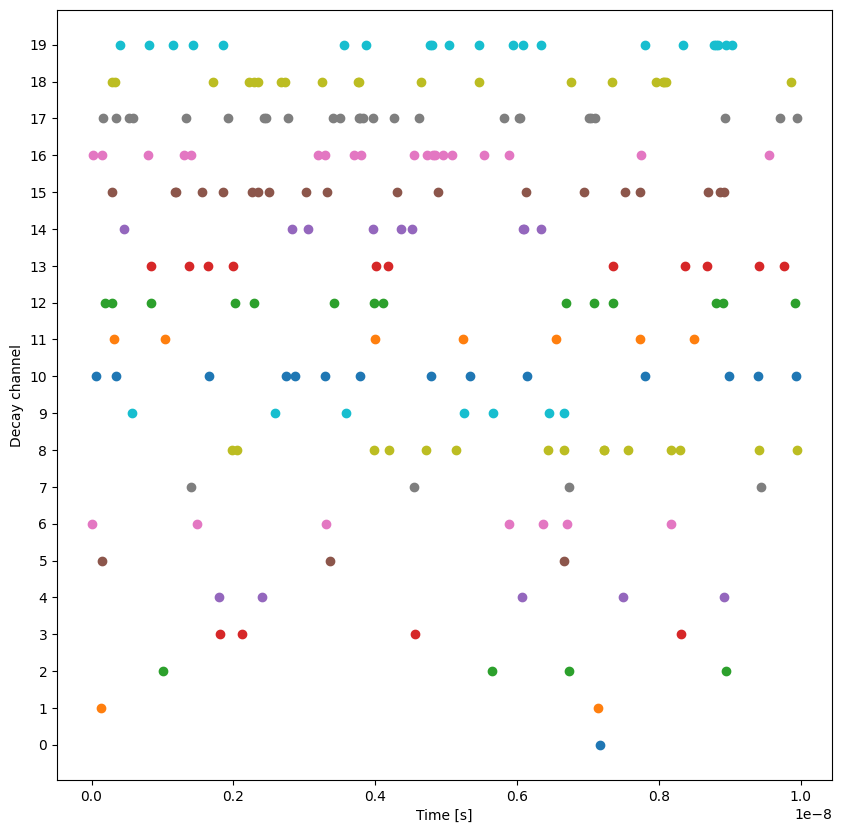

In [2]:
RNG = np.random.default_rng(1)
N_CHANNELS = 20
BATCH_SIZE = 20
DECAY_RATES = [ float(i+1)*1e8 for i in range( N_CHANNELS ) ]
StartTimes = np.zeros( len( DECAY_RATES ) )
decayTimes, timePeriod = TimeSeriesMultiChannel( BATCH_SIZE, DECAY_RATES, RNG, StartTimes )

TimelinesPlot( decayTimes )

mpl.xlabel( "Time [s]" )
mpl.yticks( range( 0, N_CHANNELS ) )
mpl.ylabel( "Decay channel" )
mpl.gcf().set_size_inches( 10, 10 )
mpl.show()

Look at the leftover events from the first batch

In [3]:
print( StartTimes )
firstLeftovers = StartTimes.copy()

[2.72212389e-08 1.00446547e-09 1.21153365e-08 6.85677341e-10
 1.71570331e-09 1.41327131e-10 5.01418201e-10 7.92838412e-10
 1.37817134e-09 2.22500581e-09 3.52023525e-10 5.71733555e-10
 7.81076230e-11 1.00060484e-10 9.62117374e-10 9.72641971e-10
 4.92649098e-10 1.71573750e-11 4.06020210e-10 1.08419180e-09]


Make a new batch using these leftovers

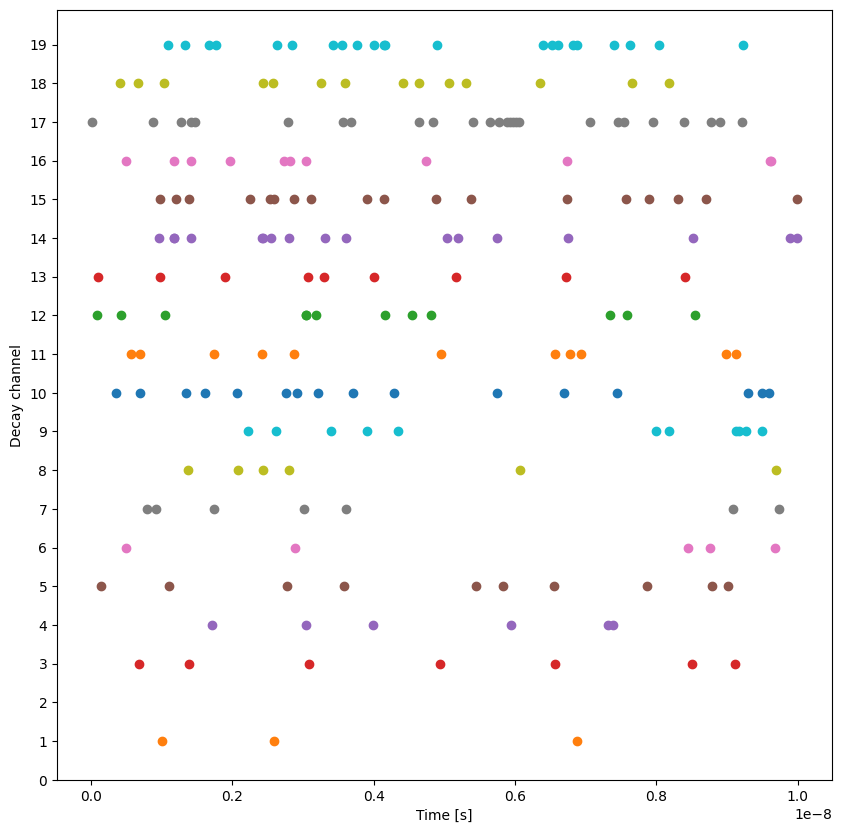

In [4]:
decayTimes2, timePeriod2 = TimeSeriesMultiChannel( BATCH_SIZE, DECAY_RATES, RNG, StartTimes )

TimelinesPlot( decayTimes2 )

mpl.xlabel( "Time [s]" )
mpl.yticks( range( 0, N_CHANNELS ) )
mpl.ylabel( "Decay channel" )
mpl.gcf().set_size_inches( 10, 10 )
mpl.show()

Look at the leftover events from the second batch

In [5]:
print( StartTimes )
secondLeftovers = StartTimes.copy()

[1.72212389e-08 5.06988937e-09 2.11533651e-09 2.87915718e-09
 9.75473461e-10 4.63814310e-09 3.83180290e-10 1.83462835e-10
 8.53881971e-10 4.29296381e-09 4.82166657e-11 3.09651784e-10
 1.10544704e-09 8.45430454e-11 1.03507199e-09 8.21786089e-11
 6.59487564e-10 3.53702793e-10 2.68998849e-10 2.09640223e-10]


Plot it all together

Note that batches themselves only have relative times, so for these plots are offset by the time period for the previous batch

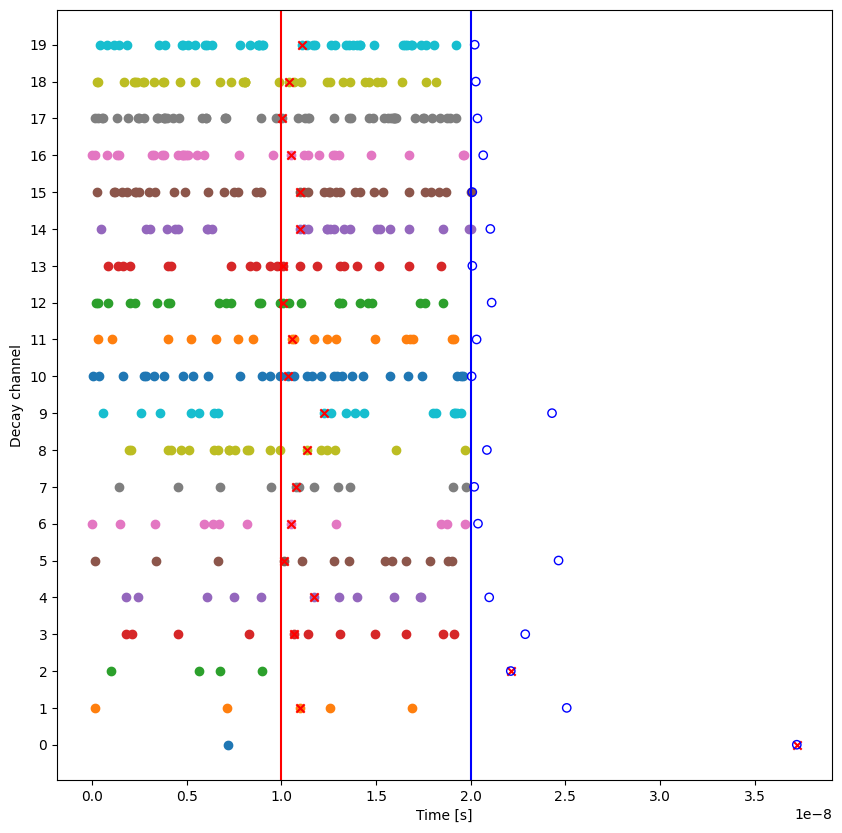

In [6]:
bothBatches = []
for i in range( len( decayTimes ) ):
    bothBatches.append( np.append( decayTimes[i], decayTimes2[i] + timePeriod ) )

TimelinesPlot( bothBatches )

leftoverChannels = np.arange(20)
mpl.scatter( firstLeftovers + timePeriod, leftoverChannels, marker="x", color="r" )

mpl.axvline( x = timePeriod, color = "r" )
mpl.scatter( secondLeftovers + timePeriod + timePeriod2, leftoverChannels, marker="o", color="b", facecolors='none' )

mpl.axvline( x = timePeriod + timePeriod2, color = "b" )

mpl.xlabel( "Time [s]" )
mpl.yticks( range( 0, N_CHANNELS ) )
mpl.ylabel( "Decay channel" )
mpl.gcf().set_size_inches( 10, 10 )
mpl.show()

Check how batching with leftovers affects the statistics (if at all)

In [7]:
%%capture

N_TRIALS = 1000
perChannelBatchTotals = np.zeros( [N_CHANNELS, N_TRIALS] )
StartTimes = np.zeros( len( DECAY_RATES ) )
for i in range( N_TRIALS ):
    decayTimes, _ = TimeSeriesMultiChannel( BATCH_SIZE, DECAY_RATES, RNG, StartTimes )
    for j in range( N_CHANNELS ):
        perChannelBatchTotals[j, i] = len( decayTimes[j] )

In [8]:
print( "With leftovers" )
print( "Channel, Total, Total - Expected, Mean, Std Dev, Std Dev / sqrt(n)" )
testValues = []
testTotals = []
for j in range( N_CHANNELS ):
    testValues.append( np.std( perChannelBatchTotals[j] ) / np.sqrt(j+1) )
    testTotals.append( np.sum( perChannelBatchTotals[j] ) - ( N_TRIALS*(j+1) ) )
    print( j, np.sum( perChannelBatchTotals[j] ), testTotals[j], np.mean( perChannelBatchTotals[j] ), np.std( perChannelBatchTotals[j] ), testValues[j] )
print( np.mean( testValues ), np.std( testValues ) )
print( np.mean( testTotals ), np.std( testTotals ) )

With leftovers
Channel, Total, Total - Expected, Mean, Std Dev, Std Dev / sqrt(n)
0 1029.0 29.0 1.029 1.0421895221119815 1.0421895221119815
1 2091.0 91.0 2.091 1.432033170006896 1.0126003653959441
2 3037.0 37.0 3.037 1.7758465586868704 1.0252854886973353
3 3977.0 -23.0 3.977 1.9905956395009006 0.9952978197504503
4 5015.0 15.0 5.015 2.1639720423332642 0.9677577176132462
5 5896.0 -104.0 5.896 2.506628013886384 1.0233266014979447
6 7023.0 23.0 7.023 2.664670899004228 1.0071509320851568
7 7969.0 -31.0 7.969 2.9387138343159576 1.038992240105767
8 8846.0 -154.0 8.846 2.9880234269496615 0.9960078089832205
9 10029.0 29.0 10.029 3.1199613779660798 0.9866184166130286
10 10982.0 -18.0 10.982 3.3819633351058087 1.0197003124804502
11 12089.0 89.0 12.089 3.517538770219882 1.015425977935697
12 12939.0 -61.0 12.939 3.5680917869359807 0.9896106071815085
13 14004.0 4.0 14.004 3.894096044013296 1.0407409448492524
14 14961.0 -39.0 14.961 3.81542645060811 0.9851388734589657
15 16047.0 47.0 16.047 4.1459366

In [9]:
%%capture

perChannelBatchTotals = np.zeros( [N_CHANNELS, N_TRIALS] )
for i in range( N_TRIALS ):
    decayTimes, _ = TimeSeriesMultiChannel( BATCH_SIZE, DECAY_RATES, RNG )
    for j in range( N_CHANNELS ):
        perChannelBatchTotals[j, i] = len( decayTimes[j] )

In [10]:
print( "Without leftovers" )
print( "Channel, Total, Total - Expected, Mean, Std Dev, Std Dev / sqrt(n)" )
testValues = []
testTotals = []
for j in range( N_CHANNELS ):
    testValues.append( np.std( perChannelBatchTotals[j] ) / np.sqrt(j+1) )
    testTotals.append( np.sum( perChannelBatchTotals[j] ) - ( N_TRIALS*(j+1) ) )
    print( j, np.sum( perChannelBatchTotals[j] ), testTotals[j], np.mean( perChannelBatchTotals[j] ), np.std( perChannelBatchTotals[j] ), testValues[j] )
print( np.mean( testValues ), np.std( testValues ) )
print( np.mean( testTotals ), np.std( testTotals ) )

Without leftovers
Channel, Total, Total - Expected, Mean, Std Dev, Std Dev / sqrt(n)
0 1037.0 37.0 1.037 1.0284118824673312 1.0284118824673312
1 2005.0 5.0 2.005 1.3605054207903766 0.9620226088819326
2 3054.0 54.0 3.054 1.7137922861303816 0.98945843773248
3 3953.0 -47.0 3.953 1.9765603962439398 0.9882801981219699
4 5075.0 75.0 5.075 2.2674600327238403 1.0140389538868808
5 5995.0 -5.0 5.995 2.404365820751909 0.9815782359717098
6 7002.0 2.0 7.002 2.613426103795552 0.9877822200696438
7 8109.0 109.0 8.109 2.801627919621019 0.9905250501627911
8 8984.0 -16.0 8.984 2.987598366581425 0.9958661221938083
9 10042.0 42.0 10.042 3.1934677076807905 1.0098631590468088
10 10918.0 -82.0 10.918 3.3417474470701705 1.0075747660054362
11 12011.0 11.0 12.011 3.4901116028001167 1.007508436689242
12 13111.0 111.0 13.111 3.6745991618134353 1.0191504380534875
13 13801.0 -199.0 13.801 3.7201342717703083 0.9942477055543051
14 15004.0 4.0 15.004 3.843694056503457 0.9924375379169547
15 15770.0 -230.0 15.77 3.931043

Honestly this doesn't seem to say that the leftovers method is any better, but I like it so I'm keeping it

Now try to make a photon stream from the first batch

227340 events loaded (1000000 simulated) with average 0.250001 hits/event


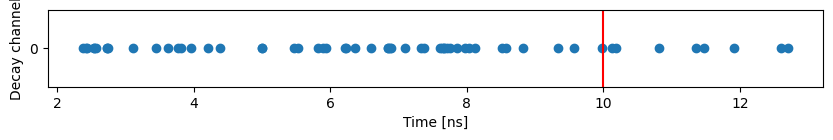

In [11]:
from SimulationDataset import *
import LegacyDatasetReader

# just use any old existing file for this demo
dataSet = SimulationDataset( "../analysis/hits.n1000000.SiemensBlock.100mm.LinearF18.700mm.-y0mm.2468.csv", 1000000 )
dataSetReader = LegacyDatasetReader.LegacyDatasetReader( dataSet )
inputData = [ dataSetReader ] * N_CHANNELS

photons = MergedPhotonStream( decayTimes, inputData, RNG )

photonTimes = []
for photon in photons:
    photonTimes.append( photon[DATASET_TIME] )

TimelinesPlot( [photonTimes] )

mpl.axvline( x = timePeriod*1e9, color = "r" )

mpl.xlabel( "Time [ns]" )
mpl.yticks( range( 0, 1 ) )
mpl.ylabel( "Decay channel" )
mpl.gcf().set_size_inches( 10, 1 )
mpl.show()

Append second batch

Again remember to offset time by previous batch time period

Overlaps are OK, because we're now including the effect of photon TOF

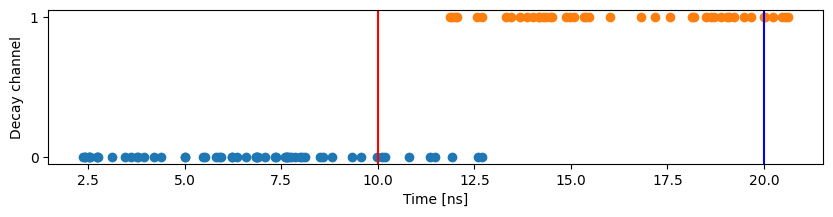

In [12]:
photons2 = MergedPhotonStream( decayTimes2, inputData, RNG )

photonTimes2 = []
for photon in photons2:
    photonTimes2.append( photon[DATASET_TIME] + (timePeriod*1e9) )

TimelinesPlot( [photonTimes, photonTimes2] )
mpl.axvline( x = timePeriod*1e9, color = "r" )
mpl.axvline( x = (timePeriod + timePeriod2)*1e9, color = "b" )

mpl.xlabel( "Time [ns]" )
mpl.yticks( range( 0, 2 ) )
mpl.ylabel( "Decay channel" )
mpl.gcf().set_size_inches( 10, 2 )
mpl.show()

Ideally this is happening inside the GenerateCoincidences method, but it's hard to show

In [13]:
from matplotlib.patches import Rectangle

def CoincidenceBoxes( Coincidences, CoincidenceTimes, TimeWindow ):
    
    for i, coincidence in enumerate( Coincidences ):
        time = CoincidenceTimes[ i ]
        y = min( coincidence )
        height = max( coincidence ) - y
        y -= 0.1
        height += 0.2
        mpl.gca().add_patch( Rectangle( (time, y), TimeWindow, height, \
                                        linewidth=1,edgecolor='r',facecolor='none') )

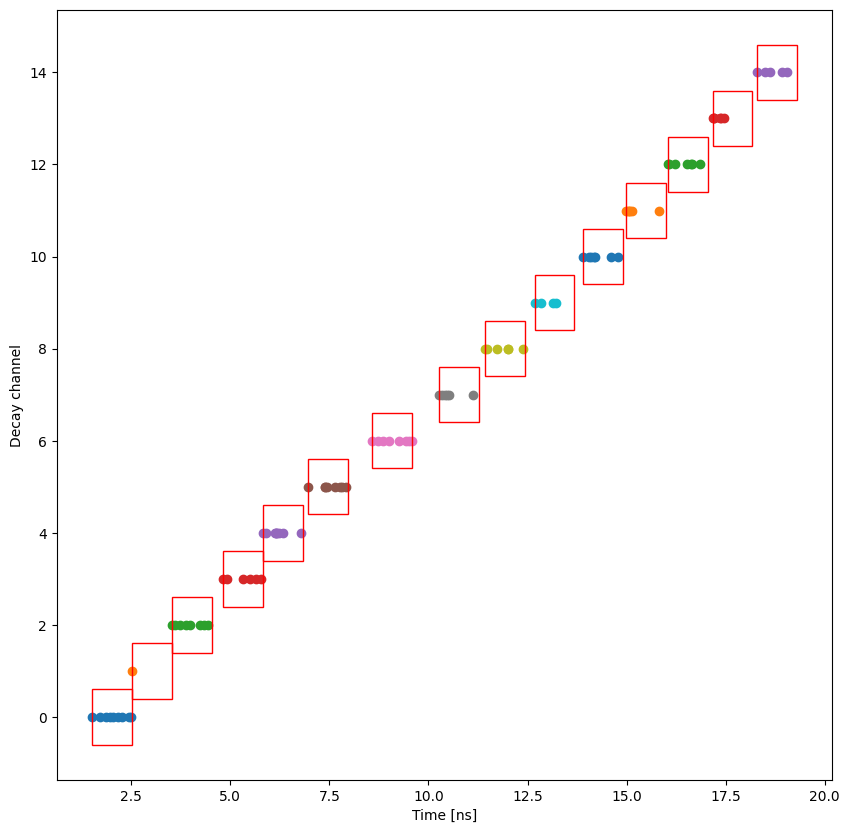

In [14]:
# Not possible to reproduce previous plots exactly unless you reset the dataset shuffle
RNG = np.random.default_rng(1)

coincidences = []
coincidencePhotonTimes = []
coincidenceTimes = []
for coincidence in GenerateCoincidences( BATCH_SIZE, DECAY_RATES, inputData, RNG, CoincidenceWindow=1, SimulationWindow=20, MultiWindow=False ):
    coincidenceTimes.append( coincidence[0, DATASET_TIME] )
    coincidenceIndex = len( coincidences )
    coincidences.append( [coincidenceIndex-0.5, coincidenceIndex+0.5] ) #photon channel info not preserved any more
    photonTimes = []
    for photon in coincidence:
        photonTimes.append( photon[DATASET_TIME] )
    coincidencePhotonTimes.append( photonTimes )

TimelinesPlot( coincidencePhotonTimes )
CoincidenceBoxes( coincidences, coincidenceTimes, 1 )

mpl.xlabel( "Time [ns]" )
mpl.ylabel( "Decay channel" )
mpl.gcf().set_size_inches( 10, 10 )
mpl.show()